In [330]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Dataset

In [331]:
data = pd.read_csv('simpleLogisticRegressionData.csv')

In [332]:
data.head()

,marks1,marks2,admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [333]:
data.shape

(100, 3)

In [334]:
not_admitted = data[data['admitted']==0]
admitted = data[data['admitted']==1]

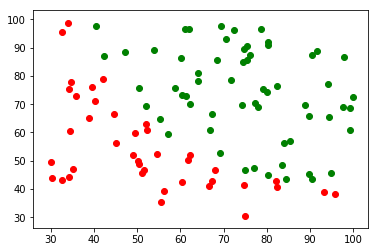

In [335]:
plt.scatter(admitted['marks1'],admitted['marks2'],c='g')
plt.scatter(not_admitted['marks1'],not_admitted['marks2'],c='r')

In [336]:
data.shape

(100, 3)

In [337]:
sigmoid = lambda z : 1/(1+np.exp(-z))

In [338]:
net_input = lambda x,theta : np.dot(x,theta)

In [339]:
def net_activation(net_input):
    return sigmoid(net_input)

In [340]:
#Setting hyper parameter
learning_rate=0.1
iterations=1000
theta = np.random.rand(3)

In [341]:
def fit(x,y,theta,learning_rate,iterations):
    cost_history=[]
    for i in range(iterations):
        netInput = net_input(x,theta)
        output = net_activation(netInput)
        errors = y - output
        theta -= learning_rate * x.T.dot(errors)
        cost = -y.dot(np.log(output)) - ((1 - y).dot(np.log(1 - output)))
        cost_history.append(cost)
    return theta,cost_history

In [343]:
def predict(x,theta):
    return np.where(net_activation(net_input(x,theta)) >= 0.5, 1, 0)

In [344]:
x0=np.ones(data.shape[0])
x1=data['marks1']
x2=data['marks2']
x=np.array([x0,x1,x2]).T
y=np.array(data['admitted'])

In [345]:
x_train=x[0:70]
y_train=y[0:70]

In [346]:
x_test=x[70:100]
y_test=y[70:100]

In [347]:
(theta,cost)=fit(x_train,y_train,theta,learning_rate,iterations)

In [348]:
theta

array([  3400.67236624, 175598.87930577, 188109.77470896])

In [349]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [350]:
y_pred = predict(x_test,theta)

In [351]:
confusion_matrix(y_test,y_pred)

array([[ 0,  6],
       [ 0, 24]], dtype=int64)

In [352]:
accuracy_score(y_test,y_pred)

0.8